# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

#### Nome: Paulo Cotta

**OBS:** I apologize for the grammatical errors, I am Brazilian and I may miss some type of writing in English.

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [2]:
!pip install torchsummary

### Imports

In [3]:
import numpy as np
import os
import numpy as np
import random
from collections import namedtuple, deque
from unityagents import UnityEnvironment
from matplotlib import pyplot as plt

# Pytorch - Framework Facebook
import torch
from torchsummary import summary

# Class of agent and model
from agent_model_dqn import Agent, QNetwork

In [4]:
os.listdir('./')

['python',
 'unity-environment.log',
 'model_weights.pth',
 'Navigation.ipynb',
 'agent_model_dqn.py',
 '.ipynb_checkpoints',
 '__pycache__']

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [5]:
# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [8]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

# Create agent

#### Methods for creating the agent

### New instance agent

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, mode='Double_DQN')

### Parameters dataset and model

In [10]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Function model for epoch's

In [11]:
def dqn_model(n_epochs=6000, eps_start=1.0, eps_end=0.01, eps_decay=0.955):
    '''
    Model - Deep-q-Learning.
    
    @arguments
        n_epochs (int): maximum number of times within the training
        max_t (int): maximum number of downtime per season
        eps_start (float): initial epsilon value, to select the action as epsilon in specific
        eps_end (float): minimum epsilon
        eps_decay (float): multiplicative factor (per season) used for the effect of decreasing epsilon
    '''
    scores = []                        # list containing the scores of each epoch or season
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_epoch in range(1, n_epochs+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        while 1:
            action = agent.get_action(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if epoch has finished
            agent.step(state, action, reward, next_state, done) # take step with agent (including learning)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:
                break
        
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        
        # Printing & Monitoring
        print('\rEpoch {}\tAVG Score: {:.2f}'.format(i_epoch, np.mean(scores_window)), end="")
        if i_epoch % 50 == 0:
            print('\rEpoch {}\tAVG Score: {:.2f}\tepsilon: {:.5f}'.format(i_epoch, np.mean(scores_window),eps))
        
        # Environment is saved if average score of last 50 epochs >= 13
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment saved in {:d} episodes!\tAVG Score: {:.2f}'.format(i_epoch, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model_weights.pth')
            break
    return scores

### Architecture model

In [12]:
summary(agent.qnetwork_local,(state_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           4,864
            Linear-2                   [-1, 64]           8,256
            Linear-3                   [-1, 32]           2,080
            Linear-4                    [-1, 4]             132
Total params: 15,332
Trainable params: 15,332
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.06
----------------------------------------------------------------


### Parameter

In [13]:
n_epoch_max = 700 # QTD epochs
eps_end = .008 # end model
eps_decay = .9277 # rate epsilion decay

### Calculate score model

In [14]:
scores = dqn_model(n_epochs = n_epoch_max, eps_end = eps_end, eps_decay = eps_decay)

Epoch 50	AVG Score: 2.80	epsilon: 0.02346
Epoch 100	AVG Score: 4.45	epsilon: 0.00800
Epoch 150	AVG Score: 7.20	epsilon: 0.00800
Epoch 200	AVG Score: 8.46	epsilon: 0.00800
Epoch 250	AVG Score: 9.37	epsilon: 0.00800
Epoch 300	AVG Score: 11.31	epsilon: 0.00800
Epoch 330	AVG Score: 13.08
Environment saved in 330 episodes!	AVG Score: 13.08


In [15]:
num_epochs = len(scores)

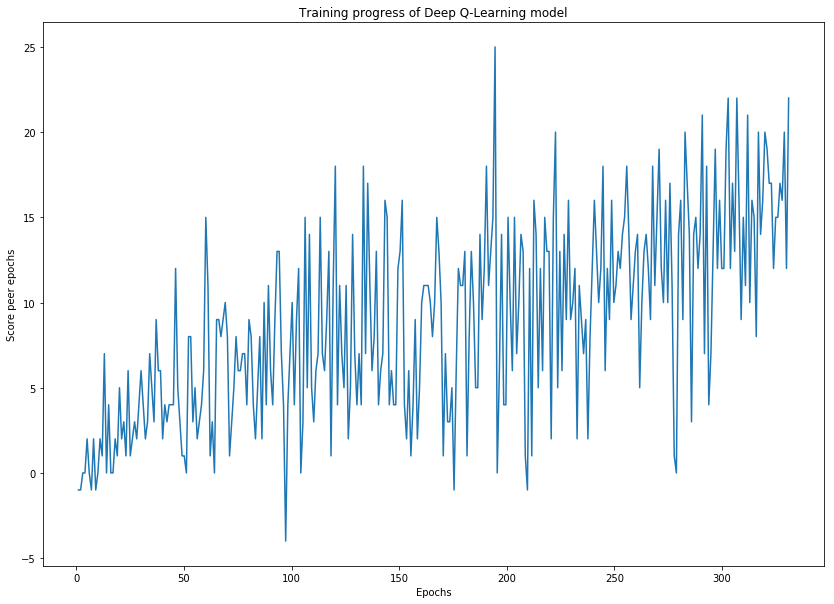

In [17]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(np.linspace(1, num_epochs+1, num_epochs), scores)
ax.set_xlabel('Epochs')
ax.set_ylabel('Score peer epochs')
ax.set_title('Training progress of Deep Q-Learning model');

In [18]:
env.close()